## 0) Preparación
Instalamos/Importamos librerías y comprobamos versiones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Versiones -> pandas:", pd.__version__, "| numpy:", np.__version__)

Versiones -> pandas: 2.2.3 | numpy: 2.1.3


## 1) Cargar el CSV de ventas
- Edita la ruta si mueves el archivo.
- read_csv lee el archivo y lo convierte en un DataFrame (df).
- Despues de leer el archivo lo que haremos sera mostrar el data set y mirar las filas y las columnas

In [2]:
csv_path = r"""players.csv"""

# Leemos el CSV a un DataFrame
df = pd.read_csv(csv_path)

# Vemos tamaño (filas, columnas) y las 5 primeras filas
print("Forma del dataset (filas, columnas):", df.shape)
df.head()

Forma del dataset (filas, columnas): (2309, 267)


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,1,Brenden Aaronson,us USA,"FW,MF",Leeds United,eng Premier League,25.0,2000.0,13,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Jones El-Abdellaoui,ma MAR,"MF,FW",Celta Vigo,es La Liga,19.0,2006.0,7,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Himad Abdelli,dz ALG,MF,Angers,fr Ligue 1,26.0,1999.0,11,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Ali Abdi,tn TUN,"DF,MF",Nice,fr Ligue 1,31.0,1993.0,7,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Salis Abdul Samed,gh GHA,MF,Nice,fr Ligue 1,25.0,2000.0,10,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1.2) EDA

- Primero de todo lo que haremos sera buscar informacion de la columna lo haremos con df.info y df.describe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2309 entries, 0 to 2308
Columns: 267 entries, Rk to AvgDist
dtypes: float64(101), int64(121), object(45)
memory usage: 4.7+ MB


- Lo que podemos visualizar con el df.info() es poder visualizar el tipo de columnas que son , en este caso hay 101 float, 121 int y 45 object

In [4]:
df.describe()

,Rk,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,...,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
count,2309.000000,2308.000000,2308.000000,2309.000000,2309.000000,2309.000000,2309.000000,2309.000000,2309.000000,2309.000000,...,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,1155.000000,25.711005,1999.229636,8.530100,6.021654,540.422261,6.003725,0.730186,0.507579,1.237765,...,276.521127,36.394366,34.512676,33.492254,120.823944,7.669014,6.478873,11.556338,1.380211,14.452817
std,666.695208,4.424105,4.425675,3.994426,4.414944,371.212853,4.124684,1.363822,0.921324,1.896186,...,149.168082,21.081052,13.036778,5.209145,66.216419,5.996124,4.306186,8.916893,1.059024,3.467001
min,1.000000,15.000000,1983.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,21.000000,1.000000,3.200000,22.300000,3.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,578.000000,22.000000,1996.000000,5.000000,2.000000,198.000000,2.200000,0.000000,0.000000,0.000000,...,130.500000,15.000000,25.625000,30.025000,60.750000,3.000000,3.900000,5.000000,0.750000,12.325000
50%,1155.000000,25.000000,2000.000000,10.000000,6.000000,515.000000,5.700000,0.000000,0.000000,0.000000,...,307.000000,40.500000,31.750000,32.550000,128.000000,6.500000,5.800000,10.000000,1.140000,14.350000
75%,1732.000000,29.000000,2003.000000,12.000000,10.000000,851.000000,9.500000,1.000000,1.000000,2.000000,...,396.000000,52.000000,43.275000,36.850000,175.000000,11.000000,7.875000,16.000000,1.662500,16.675000
max,2309.000000,42.000000,2009.000000,14.000000,14.000000,1260.000000,14.000000,14.000000,7.000000,17.000000,...,581.000000,88.000000,83.200000,51.400000,264.000000,25.000000,33.300000,38.000000,7.000000,26.000000


- Lo que vemos ahora con el df.describe es la media, el maximo el minimo etc.. de cada columna 

## 1.3) ¿Hay valores nulos o filas duplicadas?
- Calculamos el % de nulos por columna.  
- Contamos filas duplicadas exactas.

In [5]:
# % de valores nulos por columna
na_pct = (df.isna().mean() * 100).sort_values(ascending=False)
print("% de nulos por columna:")
print(na_pct.round(2))

# Filas duplicadas exactas
dup = df.duplicated().sum()
print("\nFilas duplicadas exactas:", dup)

% de nulos por columna:
CS%         93.98
PKA         93.89
D           93.89
W           93.89
Save%       93.89
            ...  
xAG          0.00
npxG+xAG     0.00
PrgC         0.00
PrgP         0.00
Rk           0.00
Length: 267, dtype: float64

Filas duplicadas exactas: 0


- Vemos que hay muchos jugadores que tienen valores nulos pero no podemos borrarlo ya que perderiamos informacion porque por ejemplo en la columna save% 
es para los porteros no para los jugadores entonces por eso hay muhco valores 0 porque no hay nada que poner

# 1.4) Separar variables numéricas y categóricas¶
- Esto nos guía para elegir qué análisis aplicar.

In [6]:

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numéricas:", numeric_cols)
print("Categóricas/Textuales:", cat_cols)


Numéricas: ['Rk', 'Age', 'Born', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'G+A-PK', 'xG+xAG', 'Rk_stats_shooting', 'Born_stats_shooting', '90s_stats_shooting', 'Gls_stats_shooting', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK_stats_shooting', 'PKatt_stats_shooting', 'xG_stats_shooting', 'npxG_stats_shooting', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Rk_stats_passing', 'Born_stats_passing', '90s_stats_passing', 'Cmp', 'Att', 'Cmp%', 'TotDist', 'PrgDist', 'Ast_stats_passing', 'xAG_stats_passing', 'xA', 'A-xAG', 'KP', '1/3', 'PPA', 'CrsPA', 'PrgP_stats_passing', 'Rk_stats_passing_types', 'Born_stats_passing_types', '90s_stats_passing_types', 'Att_stats_passing_types', 'Live', 'Dead', 'FK_stats_passing_types', 'TB', 'Sw', 'Crs', 'TI', 'CK', 'In', 'Out', 'Str', 'Cmp_stats_passing_types', 'Off', 'Blocks', 'Rk_stats_gca', 'Born_stats_gca', '90s_stats_gca', 'SCA', 'SCA

# 1.5) Selección de variables relevantes

- Ahora lo que haremos sera seleccionar las variables que nos interesen para el proyecto en mi caso son las siguientes 

In [7]:
# Listar las columnas que pandas ve
print([col for col in df.columns if "defense" in col])


['Rk_stats_defense', 'Nation_stats_defense', 'Pos_stats_defense', 'Comp_stats_defense', 'Age_stats_defense', 'Born_stats_defense', '90s_stats_defense', 'Att_stats_defense', 'Blocks_stats_defense', 'Sh_stats_defense']


In [33]:
informacion_cols = [
    'Player','Nation','Age','Pos','Squad','Comp'
]
participacion_cols = [
    'MP','Starts','Min','90s'
]
progresion_cols = [
    'Touches','Carries','PrgDist','PrgC','PrgP','PrgR'
]
desequilibrio_cols = [
    'Att_stats_possession',   # Regates intentados
    'Succ',                   # Regates completados
    'Succ%'                   # % éxito
]
ofensiva_cols = [
    'Gls','Ast','G+A',
    'xG','npxG','xAG','xG+xAG','Crs'
]
defensa_cols = [
    'Tkl','Int','Tkl+Int','Blocks'
]
eficiencia_cols = [
    'Sh','SoT','SoT%',
    'Sh/90','SoT/90',
    'G/Sh','G/SoT',
    'G-xG','np:G-xG'
]
creacion_cols = [
    'KP','PPA','1/3','CrsPA',
    'SCA','SCA90','GCA','GCA90'
]
contexto_cols = [
    'Att Pen',                  # toques en área rival
    'Def 3rd_stats_possession',
    'Mid 3rd_stats_possession',
    'Att 3rd_stats_possession',
    'Live_stats_possession',
    'Rec',                      # recepciones
    'Won',                      # duelos aéreos ganados
    'Lost',                     # duelos perdidos
    'Cmp',                      # pases completados
    'Crs',                      # centros
    'Clr'                       # despejes
]

cols_usadas = (informacion_cols + participacion_cols +
    progresion_cols +
    desequilibrio_cols +
    ofensiva_cols +
    defensa_cols +
    eficiencia_cols +
    creacion_cols +
    contexto_cols
)

cols_usadas = list(dict.fromkeys(cols_usadas))

df_model = df[cols_usadas].copy()
df_model.head()


,Player,Nation,Age,Pos,Squad,Comp,MP,Starts,Min,90s,...,Att Pen,Def 3rd_stats_possession,Mid 3rd_stats_possession,Att 3rd_stats_possession,Live_stats_possession,Rec,Won,Lost,Cmp,Clr
0,Brenden Aaronson,us USA,25.0,"FW,MF",Leeds United,eng Premier League,13,9,791,8.8,...,22,64,163,147,368,209,6,13,178,10
1,Jones El-Abdellaoui,ma MAR,19.0,"MF,FW",Celta Vigo,es La Liga,7,0,139,1.5,...,5,8,24,56,87,63,2,3,43,5
2,Himad Abdelli,dz ALG,26.0,MF,Angers,fr Ligue 1,11,9,764,8.5,...,7,157,357,90,593,421,8,3,422,10
3,Ali Abdi,tn TUN,31.0,"DF,MF",Nice,fr Ligue 1,7,5,353,3.9,...,4,45,65,48,157,88,5,2,85,9
4,Salis Abdul Samed,gh GHA,25.0,MF,Nice,fr Ligue 1,10,7,485,5.4,...,3,64,198,31,292,216,4,3,242,3


In [34]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2309 entries, 0 to 2308
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Player                    2309 non-null   object 
 1   Nation                    2309 non-null   object 
 2   Age                       2308 non-null   float64
 3   Pos                       2309 non-null   object 
 4   Squad                     2309 non-null   object 
 5   Comp                      2309 non-null   object 
 6   MP                        2309 non-null   int64  
 7   Starts                    2309 non-null   int64  
 8   Min                       2309 non-null   int64  
 9   90s                       2309 non-null   float64
 10  Touches                   2309 non-null   int64  
 11  Carries                   2309 non-null   int64  
 12  PrgDist                   2309 non-null   int64  
 13  PrgC                      2309 non-null   int64  
 14  PrgP    

# 2) Matriz de Correlación

- Vamos hacer la Matris de Correlación para saber la relacion entre varuables y asi podeer hacer histogramas con sentido ya que nos revela variables 
redundantes o muy relacionadas

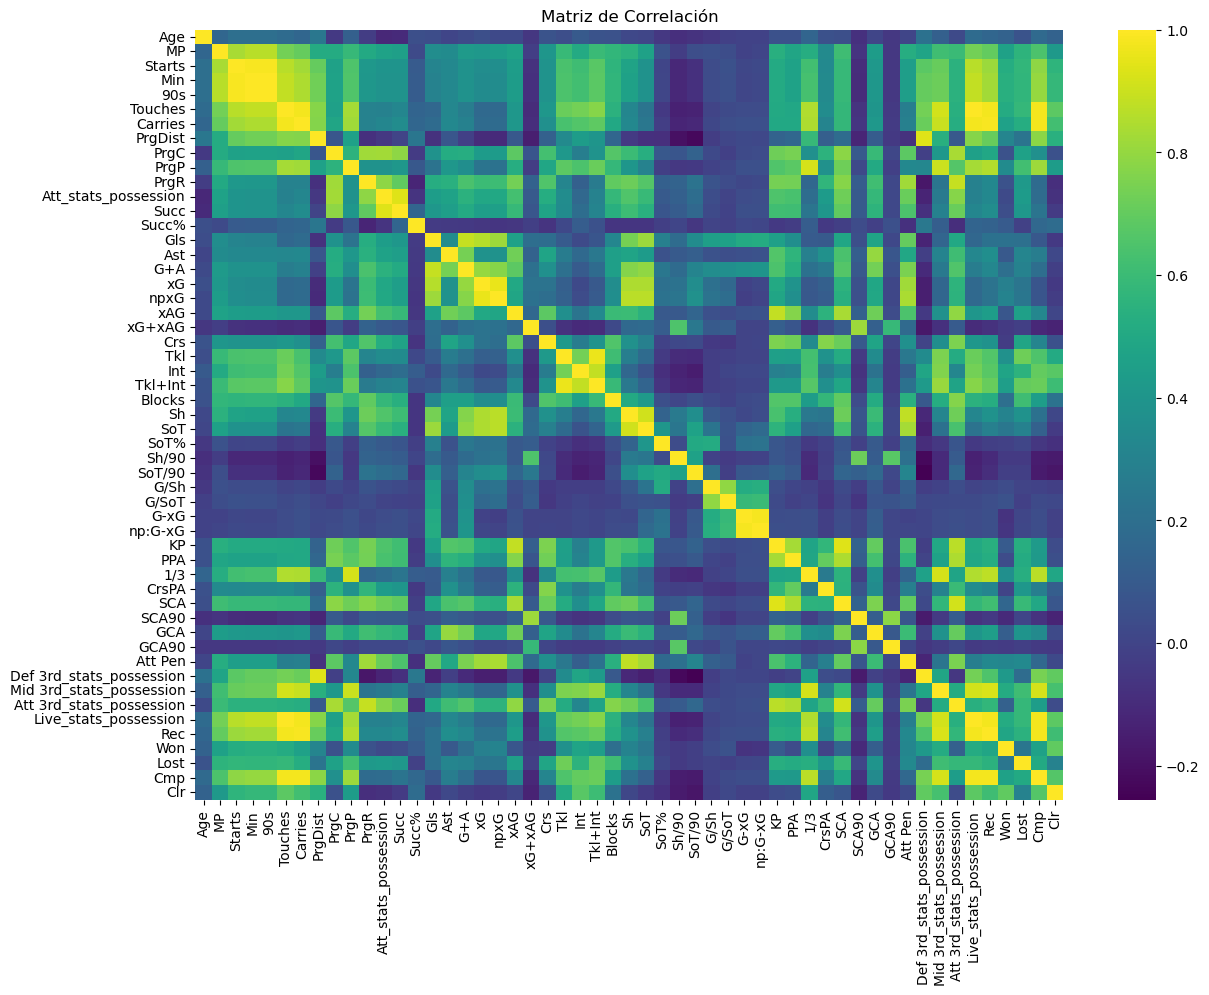

In [35]:
plt.figure(figsize=(14,10))
corr = df_model.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='viridis')
plt.title('Matriz de Correlación')
plt.show()

# 3) Histogramas de visualizacion

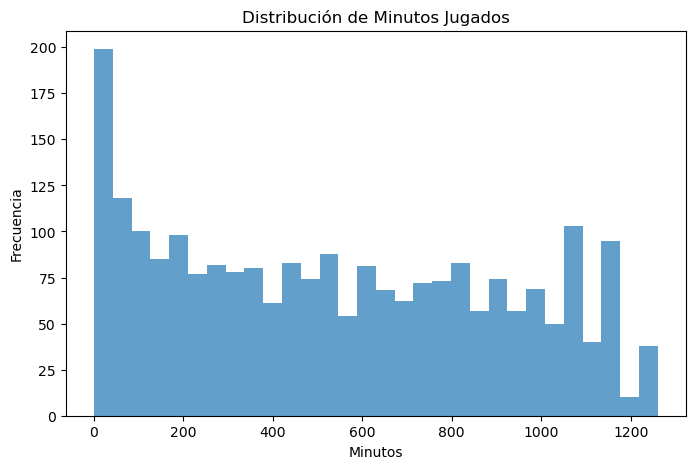

In [36]:
plt.figure(figsize=(8,5))
plt.hist(df_model['Min'], bins=30, alpha=0.7)
plt.title("Distribución de Minutos Jugados")
plt.xlabel("Minutos")
plt.ylabel("Frecuencia")
plt.show()

- Este histograma sirve para ver el reparto de carga de minutos entre todos los jugadores, podemos observar que hay muchos jugadores que no han 
disputado minutos, en este caso casi 200 jugadores no han disputado minutos,ya que pueden haberse lesionado o simplemente no cuentan con ellos como
el jugador del madrid Endrick, pero si es cierto que hay mas de 100 jugadores que si han podido disputar mas de 1000 minutos que es bastantes teniendo
en cuenta que los partido duran 90 minutos.

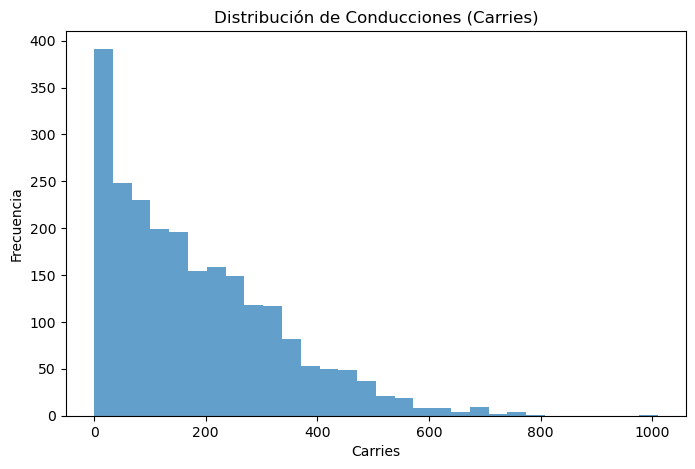

In [37]:
plt.figure(figsize=(8,5))
plt.hist(df_model['Carries'], bins=30, alpha=0.7)
plt.title("Distribución de Conducciones (Carries)")
plt.xlabel("Carries")
plt.ylabel("Frecuencia")
plt.show()

- En ste histograma sirve para medir cuántos jugadores progresan conduciendo, vemos que mas del 350 de jugadores no conducen el balon pero es normal 
ya que hay pocos jugadores que conducen mucho (extremos élite), y esto es clave para el perfilado de jugadores (player profiling). 

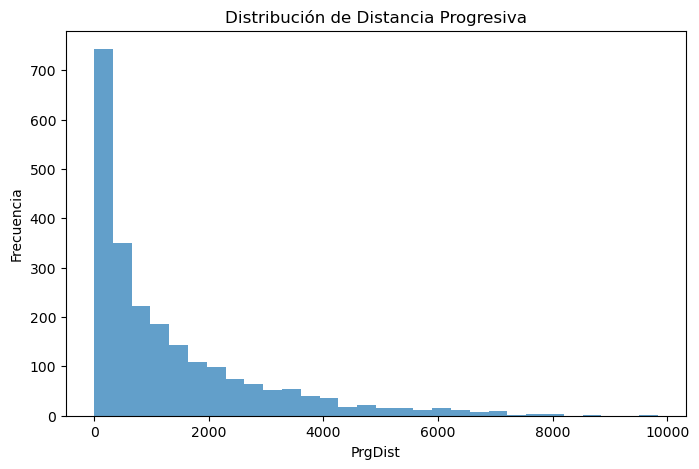

In [38]:
plt.figure(figsize=(8,5))
plt.hist(df_model['PrgDist'], bins=30, alpha=0.7)
plt.title("Distribución de Distancia Progresiva")
plt.xlabel("PrgDist")
plt.ylabel("Frecuencia")
plt.show()

- Lo que podemos visualizar en este histograma es que evalúa cuánta distancia avanza cada jugador hacia la portería rival, por ejemplo un jugador que lo
hace bastante es Pedri jugadores del Barcelona, ya que es un mediocentro que progresa hacia delante, pero por ejemplo un compañero suyo que juega mas 
atras que adelante es Frenkie de jong ya que es mas defensivo, y podemos ver que hay mucho jugadores que no juegan hacia delante ya que la liga italiana
es una liga muy defensiva en comparacion de la Inglaterra , y esto nos sirve para comparar entre ligas

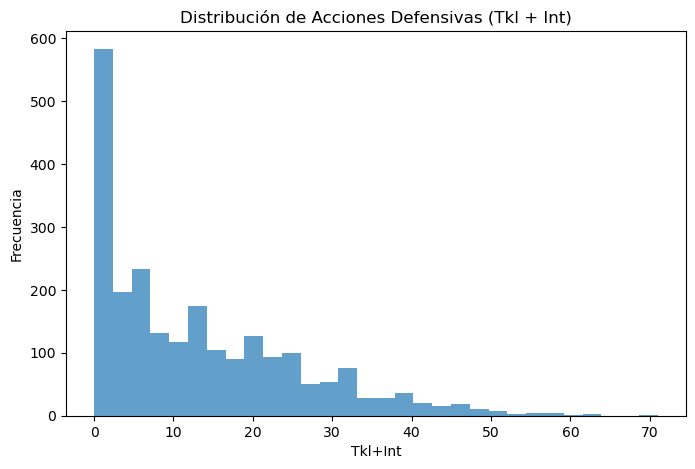

In [39]:
plt.figure(figsize=(8,5))
plt.hist(df_model['Tkl+Int'], bins=30, alpha=0.7)
plt.title("Distribución de Acciones Defensivas (Tkl + Int)")
plt.xlabel("Tkl+Int")
plt.ylabel("Frecuencia")
plt.show()


- Este histograma nos dice como puede ser un jugador , nos ayuda a ver el estilo del jugador 
    -  muy intensos defensivamente
    - mediocentros destructores
    - defensores de recuperación

- Detecta roles claramente:
    - mediocentros recuperadores
    - interiores mixtos
    - defensores pasivos

In [40]:
df_model.to_csv("dataset_eda.csv", index=False, encoding="utf-8")